In [1]:
from functions import *

In [2]:
states = ['Happiness','Frustration','Confusion','Hopefulness','Contentment',
         'Disappointment','Relief','Pride','Pleasantness','Anxiety','Engagement',
         'Interest','Sadness','Mind Wandering','Boredom','Arousal',
         'Curiosity','Surprise']
nFolds = 10

In [3]:
surveydf = readData('../Data (Algebra 1)/YearSurvey.csv')
surveydf = dropColumns(surveydf,['survey_id','time_window','question_id'])

Our goal is to generate more labels. For each state, we will train a classifier on survey instances of that state. In addition to generating predictions for the labelled data, we will generate predicitons for other survey instances that are not labelled with that state. Each state will have 10 predictions, which are then averaged.

In [4]:
predictions = np.zeros((len(surveydf),len(states)))
stds = np.zeros((len(surveydf),len(states)))
kfold = GroupKFold(n_splits = nFolds)

for s in range(len(states)):
    temp_predictions = np.zeros((len(surveydf),nFolds))
    
    # train on just the labeled state surveys
    traindf, labelSeries = filterByState(states[s], surveydf)
    train_features = traindf.values
    labels = labelSeries.values
    groups = labelSeries.index.values
    # generate predictions for all survey entries
    testdf = dropColumns(surveydf,['survey_answer','survey_question'])
    test_features = testdf.values
    
    for i, (train, test) in enumerate(kfold.split(train_features,labels,groups)):
        _, model = classify(train_features[train],labels[train],train_features[test])
        pred, std = model.predict(test_features, return_std=True)
        temp_predictions[:,i] = pred
    
    predictions[:,s] = np.mean(temp_predictions, axis=1)
    stds[:,s] = std

In [5]:
pd.DataFrame(data=predictions,columns=states, index=surveydf.index).to_csv('../Data (Algebra 1)/All state predictions.csv')

In [6]:
std_df = pd.DataFrame(data=stds,columns=states,index=surveydf.index)
summaryStats(std_df).T

133966 samples


,mean,std,min,25%,50%,75%,max
Happiness,1.43,0.23,1.42,1.42,1.43,1.43,52.83
Frustration,1.46,0.10,1.46,1.46,1.46,1.46,38.75
Confusion,1.37,0.30,1.37,1.37,1.37,1.37,64.61
Hopefulness,1.40,0.33,1.39,1.39,1.39,1.39,71.30
Contentment,1.37,0.28,1.36,1.36,1.36,1.36,60.45
Disappointment,1.47,0.37,1.47,1.47,1.47,1.47,82.12
Relief,1.42,0.35,1.42,1.42,1.42,1.42,77.43
Pride,1.39,0.11,1.38,1.38,1.38,1.38,38.05
Pleasantness,2.05,0.11,2.05,2.05,2.05,2.05,40.28
Anxiety,1.45,0.31,1.44,1.44,1.44,1.44,67.94


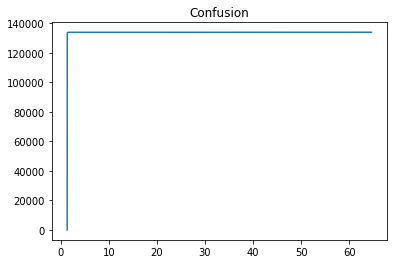

In [7]:
plotCDF('Confusion',std_df)

In [8]:
std_df = replaceDataFrameOutliers(std_df,states)

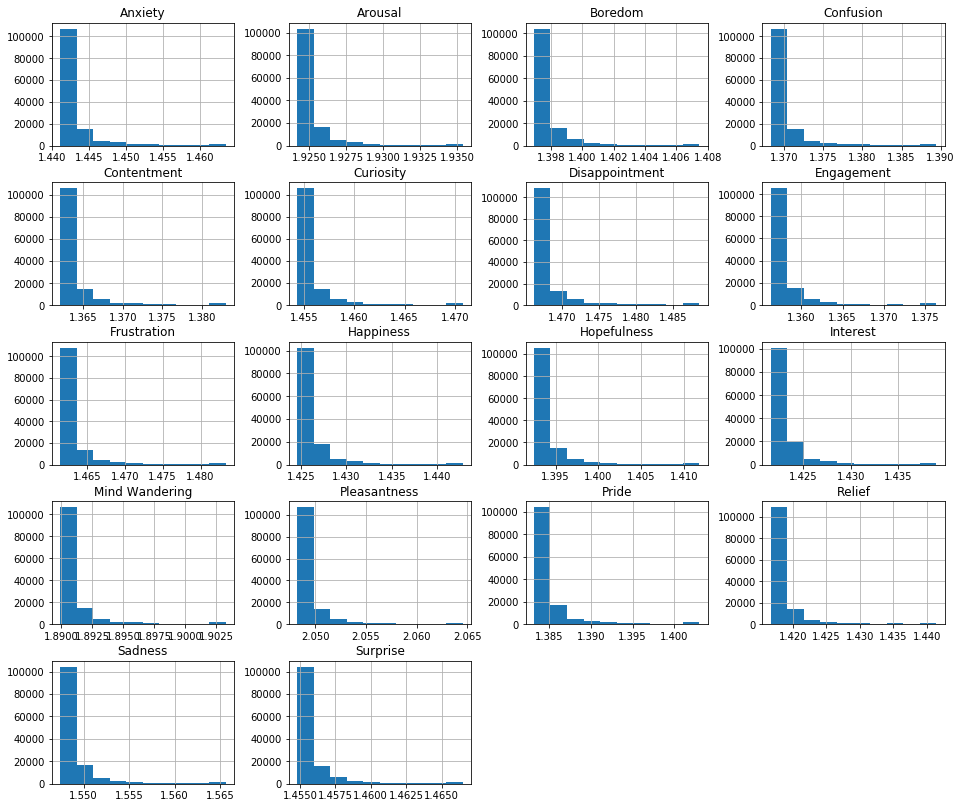

In [9]:
makeHistograms(std_df)